In [5]:
!git clone https://github.com/sorki/python-mnist
!./python-mnist/bin/mnist_get_data.sh
!pip3 install emnist
from emnist import extract_training_samples

print("Imported the EMNIST libraries we need!")

fatal: destination path 'python-mnist' already exists and is not an empty directory.
data directory already present, exiting
Imported the EMNIST libraries we need!


In [6]:
X, y = extract_training_samples('digits')
# Make sure that every pixel in all of the images is a value between 0 and 1
X = X / 255.

# Use the first 60000 instances as training and the next 10000 as testing
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# There is one other thing we need to do, we need to
# record the number of samples in each dataset and the number of pixels in each image
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

print("Extracted our samples and divided our training and testing data sets")

Extracted our samples and divided our training and testing data sets


7


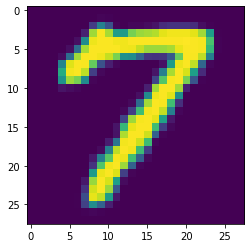

In [7]:
import matplotlib.pyplot as plt

img_index = 90 # <<<<<  You can update this value to look at other images
img = X_train[img_index]
print(y_train[img_index])
plt.imshow(img.reshape((28,28)))

In [8]:
# These two lines import the ML libraries we need
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# This creates our first MLP with 1 hidden layer with 10 neurons and sets it to run through the data 20 times
mlp1 = MLPClassifier(hidden_layer_sizes=(3), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

print("Created our first MLP network")

Created our first MLP network


In [9]:
#fit - seeing how it does for the first time
mlp1.fit(X_train, y_train)
print("Training set score: %f" % mlp1.score(X_train, y_train))
print("Test set score: %f" % mlp1.score(X_test, y_test))

Iteration 1, loss = 0.96158469
Iteration 2, loss = 0.69337156
Iteration 3, loss = 0.65977850
Iteration 4, loss = 0.64640568
Iteration 5, loss = 0.63058011
Iteration 6, loss = 0.62244975
Iteration 7, loss = 0.61745543
Iteration 8, loss = 0.61232298
Iteration 9, loss = 0.60826573
Iteration 10, loss = 0.60779770
Iteration 11, loss = 0.60481618
Iteration 12, loss = 0.60776171
Iteration 13, loss = 0.60488899
Iteration 14, loss = 0.60332799
Iteration 15, loss = 0.60235368
Iteration 16, loss = 0.60134716
Iteration 17, loss = 0.60315630
Iteration 18, loss = 0.59902039
Iteration 19, loss = 0.60029935
Iteration 20, loss = 0.60003383
Training set score: 0.825300
Test set score: 0.811600


/Users/natalieleung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


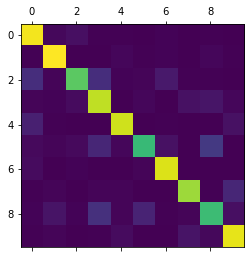

In [10]:
#figuring out where things went wrong
# First let's initialize a list with all the predicted values from the training set
y_pred = mlp1.predict(X_test)

# Now let's visualize the errors between the predictions and the actual labels using a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)
#a brighter color means more elements
#The rows are the correct value and the columns are the predicted value
#The diagonal line of cells shows when the predicted value is correct. It's good to see a bright line!
#If any of the cells off the diagonal are particularly bright, we can investigate more.

machine thought a 5 was a 3 99 times.


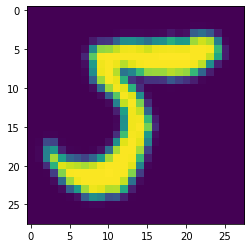

In [11]:
# You can change this to any letters that you think the neural network may have confused...
predicted_digit = 3
actual_digit = 5


# This code counts all mistakes for the letters above
mistake_list = []
#len = .length() of list
for i in range(len(y_test)):
  if (y_test[i] == actual_digit and y_pred[i] == predicted_digit):
    mistake_list.append(i)
print("machine thought a " + str(actual_digit) + " was a " + str(predicted_digit) + " " + str(len(mistake_list)) + " times.")

# Once we know how many mistakes were made, we can change this to see an image of a particular one
mistake_to_show = 1 # <<< e.g., change this to 3 if you want to see the 4th mistake

# This code checks that the number mistake you asked for can be shown and if so, displays an image of it
if (len(mistake_list)> mistake_to_show):
  img = X_test[mistake_list[mistake_to_show]]
  plt.imshow(img.reshape((28,28)))
else:
  print("Couldn't show mistake number " + str(mistake_to_show + 1) + " because there were only " + str(len(mistake_list)) + " mistakes to show!")

In [12]:
#make better mlp!
mlp2 = MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 0.40039086
Iteration 2, loss = 0.13575853
Iteration 3, loss = 0.10806607
Iteration 4, loss = 0.09200632
Iteration 5, loss = 0.08332106
Iteration 6, loss = 0.07475499
Iteration 7, loss = 0.06716370
Iteration 8, loss = 0.06477598
Iteration 9, loss = 0.06099830
Iteration 10, loss = 0.05755147
Iteration 11, loss = 0.05232682
Iteration 12, loss = 0.04960431
Iteration 13, loss = 0.04783230
Iteration 14, loss = 0.04649821
Iteration 15, loss = 0.04258938
Iteration 16, loss = 0.04152571
Iteration 17, loss = 0.04131513
Iteration 18, loss = 0.03861048
Iteration 19, loss = 0.03780015
Iteration 20, loss = 0.03651501
Iteration 21, loss = 0.03363597
Iteration 22, loss = 0.03198774
Iteration 23, loss = 0.03380402
Iteration 24, loss = 0.03111015
Iteration 25, loss = 0.03297240
Iteration 26, loss = 0.03022377
Iteration 27, loss = 0.03121698
Iteration 28, loss = 0.02819798
Iteration 29, loss = 0.02508225
Iteration 30, loss = 0.02639302
Iteration 31, loss = 0.02915459
Iteration 32, los

/Users/natalieleung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


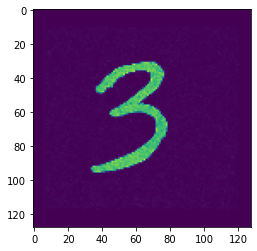

In [66]:
# importing cv2 
!pip install opencv-python
import cv2
  
# path
path = '/Users/natalieleung/Desktop/Digits/three.jpeg'

myimg = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

#invert image
myimg = cv2.bitwise_not(myimg)

#resize to 128x128
myimg = cv2.resize(myimg, (128,128), interpolation = cv2.INTER_CUBIC)

import matplotlib.pyplot as plt
plt.imshow(myimg)

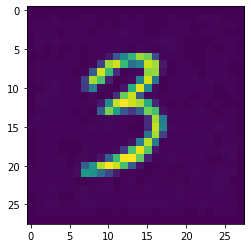

In [67]:
#step 1: Apply Gaussian blur filter
myimg = cv2.GaussianBlur(myimg, (7,7), 0)

#steps 2 and 3: Extract the Region of Interest in the image and center in square
points = cv2.findNonZero(myimg)
x, y, w, h = cv2.boundingRect(points)
if (w > 0 and h > 0):
    if w > h:
        y = y - (w-h)//2
        myimg = myimg[y:y+w, x:x+w]
    else:
        x = x - (h-w)//2
        myimg = myimg[y:y+h, x:x+h]
#step 4: Resize and resample to be 28 x 28 pixels
myimg = cv2.resize(myimg, (28,28), interpolation = cv2.INTER_CUBIC)

#step 5: Normalize pixels and reshape before adding to the new story array
myimg = myimg/255
myimg = myimg.reshape((28,28))
plt.imshow(myimg)

[5]


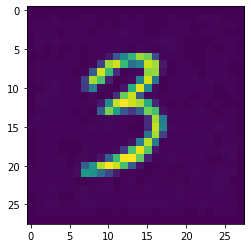

In [68]:
prediction = mlp2.predict(myimg.reshape(1,784))
plt.imshow(myimg)
print(prediction)

In [69]:
predictionsArray = mlp2.predict_proba(myimg.reshape(1,784))
import numpy as np
print(predictionsArray)
print(np.argmax(predictionsArray))

[[2.33751829e-03 1.08075729e-01 2.60916385e-03 1.19943395e-02
  8.42254392e-05 5.92336461e-01 1.23903159e-02 2.28617205e-04
  2.69388139e-01 5.55490432e-04]]
5


In [70]:
def plot_value_array(predictions_array):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

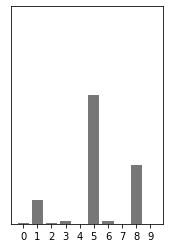

In [71]:
plt.subplot(1,2,1)
plot_value_array(predictionsArray)
plt.show()